In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Символьные вычисления

## 1. Создание символьных выражений

Рассмотрим возможность выполнять символьные вычисления, реализованные в библиотеке `sympy`.

In [2]:
import sympy

Это большая библиотека, реализующая многие методы. Рассмотрим только некоторые ее возможности.

*Символьные* (или *безошибочные*, или *аналитические*) *вычисления* - это процедуры преобразования математических выражений, их упрощений, аналитического нахождения корней уравнения, аналитического дифференцирования, интегрирования и т.д.

Пусть, например, у нас есть выражение
$$
x^2y + 2xy^2 + (1-x)^2 + 4\sin x\cos x, 
$$
зависящее от двух *переменных* (или *символов*, или *букв*) $x$, $y$, и мы хотим, скажем, упростить это выражение. Данные "математические" переменные следует отличать от "питоновских" переменных.

Вначале мы должны завести у себя эти переменных $x$, $y$. Завести переменную можно с помощью функции `symbols()`. Например,

In [3]:
sympy.symbols('x')

x

Лучше сразу присвоить полученный объект какой-нибудь переменной. Разумно, чтобы питоновская переменная `x` соответствовала математической переменной $x$:

In [4]:
x = sympy.symbols('x')
type(x)

sympy.core.symbol.Symbol

Теперь создадим переменную $y$:

In [5]:
y = sympy.symbols('y')

Теперь можем работать с выражениями от $x$ и $y$:

In [6]:
expr = x**2*y - y**2 + 2*x*y + (x-y)**2 + 4*sympy.sin(x)*sympy.cos(x)
expr

x**2*y + 2*x*y - y**2 + (x - y)**2 + 4*sin(x)*cos(x)

Обратите внимание, что мы использовали функцию `sin` из модуля `sympy`.

Теперь можем, скажем, упростить выражение:

In [7]:
sympy.simplify(expr)

x**2*y + x**2 + 2*sin(2*x)

Можно создать сразу несколько символьных переменных, перечислив их в строковом аргументе функции `symbols` через пробел или через запятую:

In [8]:
a, b, c, d, n, z, alpha, beta = sympy.symbols('a b c d n z alpha beta')

Обратите внимание, что sympy знает, как выглядят греческие буквы (и большие, и маленькие):

In [9]:
alpha

alpha

In [10]:
sympy.symbols('Sigma_123')

Sigma_123

Sympy знает о константах $\pi$ и $e$:

In [11]:
sympy.pi

pi

In [12]:
sympy.exp(1)

E

In [13]:
sympy.sin(sympy.pi)

0

Получить нужное количество цифр можно с помощью метода `evalf`:

In [14]:
sympy.pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

Символьные вычисления подразумевают по умолчанию выполнение точных операций с целыми, рациональными и иррациональными числами. Создать рациональное число $p/q$ можно с помощью конструктора `Rational(p, q)`:

In [15]:
sympy.Rational(1, 3)

1/3

In [16]:
sympy.Rational(1, 3) + sympy.Rational(1, 2)

5/6

Конвертировать целое число в символьное выражение можно с помощью конструктора `Integer`. Впрочем, если целое число встречается внутри некоторого выражения, в котором участвуют символьные объекты, то оно конвертируется автоматически.

In [17]:
sympy.Integer(121)

121

## 2. Основные операции над выражениями

### 2.1. Равенство двух выражений

Знак `==` соответствует полному совпадению выражений:

In [18]:
(x+2)**2 == (x+2)**2

True

Однако

In [19]:
(x+2)**2 == x**2 + 4*x + 4

False

Чтобы сравнить два выражения на равенство надо воспользоваться методом `equals`:

In [20]:
f1 = (x+2)**2
f2 = x**2 + 4*x + 4

In [21]:
f1.equals(f2)

True

In [22]:
sympy.simplify(f1 - f2)

0

Приведем пример чуть посложнее. Давайте сравним два числа: $\sqrt{6-2\sqrt{5}}$ и $\sqrt{5}-1$ (Конечно, вы сможете доказать, что они совпадают)

In [23]:
expr1 = sympy.sqrt(6 - 2*sympy.sqrt(5))
expr1

sqrt(6 - 2*sqrt(5))

In [24]:
expr2 = sympy.sqrt(5) - 1
expr2

-1 + sqrt(5)

In [25]:
expr1.equals(expr2)

True

Тем не менее:

In [26]:
sympy.simplify(expr1)

sqrt(6 - 2*sqrt(5))

In [27]:
sympy.simplify(expr2 - expr1)

-sqrt(6 - 2*sqrt(5)) - 1 + sqrt(5)

Для проверки мы можем вычислить несколько первых цифр в десятичной записи этих иррациональностей:

In [28]:
expr1.evalf(30)

1.23606797749978969640917366873

In [29]:
expr2.evalf(30)

1.23606797749978969640917366873

### 2.2. Подстановка `subs`

Вместо любой символьной переменной и даже вместо выражения можно подставить другое выражение:

In [30]:
sympy.sin(2*x).subs(x, 0)

0

In [31]:
sympy.sin(2*x).subs(x, 2*y)

sin(4*y)

In [32]:
(x + y).subs(x + y, 7)

7

In [33]:
(x + y).subs({x: 1, y: 2})

3

### 2.3. Конвертация строк в символьные выражения `sympify` 

Символьные строки можно сразу конвертировать в символьные выражения методом `sympify` (не путать с `simplify`):

In [34]:
sympy.sympify('2*x*y + sqrt(2) + 1/3 - z')

2*x*y - z + 1/3 + sqrt(2)

### 2.4. Вычисление значения выражения `evalf`

Заменить все участвующие в выражении константы на их приближение в виде числа с плавающей запятой можно с помощью метода `evalf`:

In [35]:
((sympy.sqrt(5)+1)/2).evalf(50)

1.6180339887498948482045868343656381177203091798058

In [36]:
(sympy.sqrt(2)*x).evalf()

1.4142135623731*x

### 2.5. Создание функци на основе символьных выражений `lambdify`

`subs` и `evalf` позволяют вычислить значение выражения в какой-то точке, однако они работают достаточно медленно. Выйти из положения позволяет функция `lambdify`, которая создает функцию по заданному символьному выражению. При этом полученную функцию можно использовать в духе библиотеки `numpy`:

In [37]:
myfun = sympy.lambdify(x, x**2 + 2*x - 1)

In [38]:
myfun(0)

-1

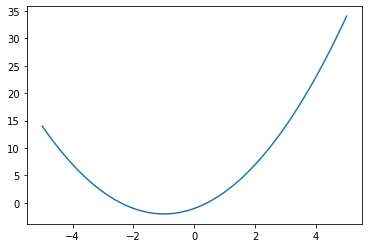

In [39]:
xx = np.linspace(-5, 5, 500)
yy = myfun(xx)
plt.plot(xx, yy)
pass

## 3. Преобразования выражений

### 3.1. Упрощение выражений `simplify`

В библиотеке sympy имеются десятки функций для преобразования выражений (раскрятия скобок, разложения на множители, использование тригонометрических формул и т.д.). Среди них выделяется функция `simplify`, которая стремится найти самую простую форму выражения. `simplify` можно использовать и как функцию, и как метод.

In [40]:
rat_expr = (2*x**5 + 3*x**4 + 4*x**3 + x**2 - 1)/(x**4 + 2*x**3 + 3*x**2 + 2*x + 1)
rat_expr

(2*x**5 + 3*x**4 + 4*x**3 + x**2 - 1)/(x**4 + 2*x**3 + 3*x**2 + 2*x + 1)

In [41]:
sympy.simplify(rat_expr)

2*x - 1

In [42]:
trig_expr = sympy.sin(x)**2 + sympy.cos(x)**2
trig_expr

sin(x)**2 + cos(x)**2

In [43]:
sympy.simplify(trig_expr)

1

In [44]:
trig_expr = sympy.sin(x)**4 - 2*sympy.cos(x)**2*sympy.sin(x)**2 + sympy.cos(x)**4
trig_expr

sin(x)**4 - 2*sin(x)**2*cos(x)**2 + cos(x)**4

In [45]:
sympy.simplify(trig_expr)

cos(4*x)/2 + 1/2

### 3.2. Раскрытие скобок `expand` 

(можно использовать как функцию и как метод):

In [46]:
poly_expr = (1+x)**3 - (1+2*x)**2
poly_expr

(x + 1)**3 - (2*x + 1)**2

In [47]:
poly_expr.expand()

x**3 - x**2 - x

In [48]:
((a + b)**2).expand()

a**2 + 2*a*b + b**2

In [49]:
((a + b)**3).expand()

a**3 + 3*a**2*b + 3*a*b**2 + b**3

In [50]:
(1+x)**10

(x + 1)**10

In [51]:
((1+x)**10).expand()

x**10 + 10*x**9 + 45*x**8 + 120*x**7 + 210*x**6 + 252*x**5 + 210*x**4 + 120*x**3 + 45*x**2 + 10*x + 1

### 3.3. Факторизация (разложение на множители) `factor`

Факторизация (разложение на множители) - в некотором смысле операция обратная к операции раскрытия выражения. Она более сложная.

In [52]:
(a**2 + 2*a*b + b**2).factor()

(a + b)**2

In [53]:
(x**10 + 1).factor()

(x**2 + 1)*(x**8 - x**6 + x**4 - x**2 + 1)

### 3.4. `Collect`

Собрать коэффициенты у заданной переменной в нужной степени 

In [54]:
expr = x**2*y*z - 2*x**2*z**3 - 2*x*y + 2*x - 1
expr

x**2*y*z - 2*x**2*z**3 - 2*x*y + 2*x - 1

In [55]:
expr.collect(x)

x**2*(y*z - 2*z**3) + x*(2 - 2*y) - 1

In [56]:
expr.collect(y)

-2*x**2*z**3 + 2*x + y*(x**2*z - 2*x) - 1

### 3.5. Сокращение рационального выражения `cancel`

In [57]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

(x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)

In [58]:
expr.cancel()

(y**2 - 2*y*z + z**2)/(x - 1)

### 3.6. Разложение на простейшие дроби `apart`

In [59]:
expr = (x**4 + 3*x**3 - 4*x**2 - 11*x - 4)/(x**5 + 5*x**4 + 9*x**3 + 8*x**2 + 4*x)
expr

(x**4 + 3*x**3 - 4*x**2 - 11*x - 4)/(x**5 + 5*x**4 + 9*x**3 + 8*x**2 + 4*x)

In [60]:
expr.apart()

(2*x - 1)/(x**2 + x + 1) + (x + 2)**(-2) - 1/x

## 4. Решение уравнений

Обратите внимание на второй аргумент - неизвестная, относительно которой необходимо решить уравнение:

In [61]:
sympy.solve(a*x**2 + b*x + c, x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

In [62]:
x1, x2 = sympy.solve(a*x**2 + b*x + c, x)

In [63]:
x1

(-b + sqrt(-4*a*c + b**2))/(2*a)

In [64]:
x2

-(b + sqrt(-4*a*c + b**2))/(2*a)

Некоторые тригонометрические уравнения ему по зубам, но, все равно, он находит только некоторые решения:

In [65]:
sympy.solve(sympy.sin(x)-sympy.pi/4, x)

[pi - asin(pi/4), asin(pi/4)]

А вот формулы для решения кубического уравнения:

In [66]:
cubic = a*x**3 + b*x**2 + c*x + d
x1, x2, x3 = sympy.solve(cubic, x)
x1

-(-3*c/a + b**2/a**2)/(3*(sqrt(-4*(-3*c/a + b**2/a**2)**3 + (27*d/a - 9*b*c/a**2 + 2*b**3/a**3)**2)/2 + 27*d/(2*a) - 9*b*c/(2*a**2) + b**3/a**3)**(1/3)) - (sqrt(-4*(-3*c/a + b**2/a**2)**3 + (27*d/a - 9*b*c/a**2 + 2*b**3/a**3)**2)/2 + 27*d/(2*a) - 9*b*c/(2*a**2) + b**3/a**3)**(1/3)/3 - b/(3*a)

Они выглядят очень громоздко. Любое кубическое уравнение линейной заменой $x \to x - \frac{b}{3a}$ можно привести к виду $x^3+px+q=0$. Давайте это проверим:



In [67]:
cubic_reduced = cubic.subs(x, x - b/(3*a))
cubic_reduced

a*(x - b/(3*a))**3 + b*(x - b/(3*a))**2 + c*(x - b/(3*a)) + d

In [68]:
cubic_reduced.expand().collect(x)

a*x**3 + d + x*(c - b**2/(3*a)) - b*c/(3*a) + 2*b**3/(27*a**2)

In [69]:
p, q = sympy.symbols('p q')

In [70]:
p, q = sympy.symbols('p q')
x1, x2, x3 = sympy.solve(x**3 + p*x + q, x)
x1

p/(27*q/2 + sqrt(108*p**3 + 729*q**2)/2)**(1/3) - (27*q/2 + sqrt(108*p**3 + 729*q**2)/2)**(1/3)/3

In [71]:
x2

p/((-1/2 - sqrt(3)*I/2)*(27*q/2 + sqrt(108*p**3 + 729*q**2)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27*q/2 + sqrt(108*p**3 + 729*q**2)/2)**(1/3)/3

In [72]:
x3

p/((-1/2 + sqrt(3)*I/2)*(27*q/2 + sqrt(108*p**3 + 729*q**2)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(27*q/2 + sqrt(108*p**3 + 729*q**2)/2)**(1/3)/3

Заметим, что `SymPy` выдал не самый компактный вид этих формул. Для сравнения приведем один из возможных видов этих формул (*формул Кардано*):

$$
x_1 = \alpha + \beta, \qquad
x_{2,3} = -\frac{\alpha + \beta}{2} \pm i \frac{\alpha - \beta}{2} \sqrt{3},
$$
где
$$
\alpha = \sqrt[3]{ -\frac{q}{2} + \sqrt{Q} },\qquad
\beta = \sqrt[3]{ -\frac{q}{2} - \sqrt{Q} }, \qquad
Q = \left( \frac{p}{3} \right)^3 + \left( \frac{q}{2} \right)^2.
$$

Справится ли `SymPy` с проверкой формул Виета?
Проверим:

In [73]:
sympy.simplify(x1 + x2 + x3)

0

In [74]:
sympy.simplify(x1*x2 + x1*x3 + x2*x3)

p

In [75]:
sympy.simplify(x1*x2*x3)

-q*(-3*2**(2/3)*p*(27*q + 3*sqrt(3)*sqrt(4*p**3 + 27*q**2))**(1/3) + 3*p*(108*q + 12*sqrt(3)*sqrt(4*p**3 + 27*q**2))**(1/3) + 72*q + 8*sqrt(12*p**3 + 81*q**2))/(72*q + 8*sqrt(3)*sqrt(4*p**3 + 27*q**2))

Произведение корней должно равняться $-q$.

## 5. Математический анализ

### 5.1. Пределы

Найти предел $\lim_{x\to x_0} f(x)$ можно с помощью функции `limit(f(x), x, x0)`.
Например,

In [76]:
sympy.limit(sympy.sin(x)/x, x, 0)

1

In [77]:
sympy.limit(x*sympy.log(x), x, 0)

0

### 5.2. Ряд Тейлора `series`

Метод `series()` дает первых члены разложения в ряд Тейлор (по умолчанию до $x^5$):

In [78]:
sympy.sin(x).series()

x - x**3/6 + x**5/120 + O(x**6)

In [79]:
sympy.exp(x).series()

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

In [80]:
(sympy.exp(sympy.sin(x))).series()

1 + x + x**2/2 - x**4/8 - x**5/15 + O(x**6)

`series(x, x0, n)` дает $n$ членов разложения в ряд Тейлора по переменной $x$ в точке $x_0$ 

In [81]:
sympy.log(x).series(x, 1, 6)

-1 - (x - 1)**2/2 + (x - 1)**3/3 - (x - 1)**4/4 + (x - 1)**5/5 + x + O((x - 1)**6, (x, 1))

Можно удалить остаточный член:

In [82]:
sympy.exp(x).series(n=10).removeO()

x**9/362880 + x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

#### Пример
Аппрoксимация $\sin(x)$ отрезком ряда Тейлора.


x
-x**3/6 + x
x**5/120 - x**3/6 + x
-x**7/5040 + x**5/120 - x**3/6 + x
x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


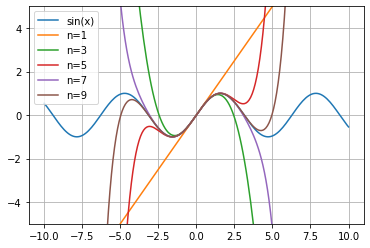

In [83]:
fun = sympy.sin(x)
fun_lambda = sympy.lambdify(x, fun)

xx = np.linspace(-10, 10, 200)
plt.plot(xx, fun_lambda(xx), label=str(fun))
plt.grid()
plt.ylim([-5, 5])

for n in range(2, 11, 2):
    tailor = fun.series(n=n).removeO()
    tailor_lambda = sympy.lambdify(x, tailor)
    print(tailor)
    plt.plot(xx, tailor_lambda(xx), label='n='+str(n-1))
    
plt.legend()  
pass

### 5.3. Производные

Для вычисления производной от $f(x)$ по $x$ можно воспользоваться функцией `diff(f,x)`:

In [84]:
f = 2*x**2-5*x+sympy.sin(x)+sympy.exp(x**2)
f

2*x**2 - 5*x + exp(x**2) + sin(x)

In [85]:
sympy.diff(f)

2*x*exp(x**2) + 4*x + cos(x) - 5

In [86]:
sympy.diff(f, x)

2*x*exp(x**2) + 4*x + cos(x) - 5

А вот так можно вычислить 2-ю производную:

In [87]:
sympy.diff(f, x, x)

4*x**2*exp(x**2) + 2*exp(x**2) - sin(x) + 4

Можно использовать одноименный метод:

In [88]:
(x**5).diff(x, x)

20*x**3

In [89]:
n = sympy.symbols('n')

In [90]:
sympy.diff(x**n, x)

n*x**n/x

In [91]:
sympy.diff(x**n, n)

x**n*log(x)

In [92]:
sympy.diff(x**x)

x**x*(log(x) + 1)

### 5.4. Интегралы

In [93]:
sympy.integrate(2*x**2 - 5*x)

2*x**3/3 - 5*x**2/2

In [94]:
sympy.integrate(x**n, x)

Piecewise((x**(n + 1)/(n + 1), Ne(n, -1)), (log(x), True))

Напомним, что неопределенный интеграл определен с точностью до постоянного слагаемого, которое `SymPy` не выдает.

In [95]:
sympy.integrate(sympy.exp(x**2), x)

sqrt(pi)*erfi(x)/2

${\rm erfi}\, x$ - это так называемая *функция ошибок*. По определению, она равна
$$
{\rm erfi}\, x =
\frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2} dt.
$$

`integrate(f, (x, a, b))` вычисляет определенный интеграл
$$
I = \int_a^b f(x) dx
$$
Например,

In [96]:
sympy.integrate(x**10, (x, 0, 2))

2048/11

In [97]:
sympy.integrate(sympy.sin(x), (x, 0, sympy.pi/2))

1

In [98]:
t = sympy.symbols('t')
sympy.integrate(sympy.exp(-t**2), (t, 0, x))

sqrt(pi)*erf(x)/2

Можно вычислять значения несобственных интегралов. Например, 

In [99]:
from sympy import oo
sympy.integrate(sympy.exp(-x**2), (x, -oo, oo))

sqrt(pi)

`oo` - это бесконечность $\infty$

In [100]:
sympy.erfi(oo)

oo

Повторные интегралы:

In [101]:
sympy.integrate(sympy.exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

pi

С помощью конструктора `Integral` можно создавать выражения, в которое будет входить значок интегрирования:

In [102]:
I = sympy.Integral(sympy.cos(x)**2, (x, 0, sympy.pi))
I

Integral(cos(x)**2, (x, 0, pi))

Тогда вычислить его можно так:

In [103]:
I.doit()

pi/2

**Пример**

In [104]:
f = x**3*sympy.exp(-x)/(1-sympy.exp(-x))
f

x**3*exp(-x)/(1 - exp(-x))

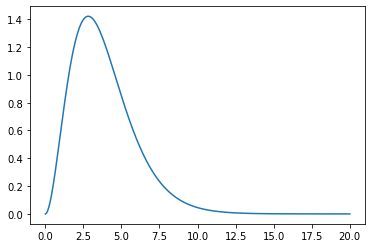

In [105]:
xx = np.linspace(0.01, 20, 500)
yy = sympy.lambdify(x, f)(xx)
plt.plot(xx, yy)
pass

In [106]:
I = sympy.Integral(f, (x, 0, oo))
I

Integral(x**3*exp(-x)/(1 - exp(-x)), (x, 0, oo))

In [107]:
I.doit()

Integral(x**3/(exp(x) - 1), (x, 0, oo))

На самом деле интеграл равен $\pi^4/15$. `SymPy` не смог вычислить интеграл символьно, но попробуем сделать это численно:

In [108]:
I.evalf(30)

6.49393940226682914909602217925

In [109]:
(sympy.pi**4/15).evalf(30)

6.49393940226682914909602217925

## 6. Обыкновенные дифференциальные уравнения

Чтобы с помощью библиотеки решать дифференциальные уравнения, во-первых, необходимо определить объект, соответствующий символьной функции

In [110]:
y = sympy.Function('y')
y

y

In [111]:
type(y)

sympy.core.function.UndefinedFunction

С этим объектом можно выполнять некоторые операции. Например, взять производную:

In [112]:
sympy.diff(y(t), t)

Derivative(y(t), t)

Само уравнение создаем с помощью функции Eq:

In [113]:
F = y(t).diff(t, t) - y(t)
sympy.Eq(F, 0)

Eq(-y(t) + Derivative(y(t), (t, 2)), 0)

Общее решение дифференциального уравнения $F(y^{(n)},\dots,y'',y',y,t) = 0$ находим с помощью функции `dsolve(F)`:

In [114]:
sympy.dsolve(F)

Eq(y(t), C1*exp(-t) + C2*exp(t))

Можно задавать начальные условия:

In [115]:
y_sol = sympy.dsolve(F, ics={y(0): 1, sympy.diff(y(t), t).subs(t,0): 0})
y_sol

Eq(y(t), exp(t)/2 + exp(-t)/2)

### Пример. Уравнение осциллятора

*Осциллятор* - это название математической модели, описывающей ряд физических процессов:
колебание математического маятника с малыми углами отклонения, колебания груза на пружине (оба: с учетом силы трения), LC-цепь и др. Процесс описывается уравнением:
$$
m \frac{d^2 y(t)}{dt^2} + \alpha\frac{d y(t)}{dt} + k y(t) = 0.
$$

In [116]:
m, alpha, k = sympy.symbols('m, alpha, k')
diff_eq = m*y(t).diff(t, t) + alpha*y(t).diff(t) + k*y(t)
sympy.Eq(diff_eq, 0)

Eq(alpha*Derivative(y(t), t) + k*y(t) + m*Derivative(y(t), (t, 2)), 0)

In [117]:
y_sol = sympy.dsolve(diff_eq)
y_sol

Eq(y(t), C1*exp(t*(-alpha - sqrt(alpha**2 - 4*k*m))/(2*m)) + C2*exp(t*(-alpha + sqrt(alpha**2 - 4*k*m))/(2*m)))

Возьмем начальное условие $y(0)=1$, $y'(0)=0$:

In [118]:
y_sol = sympy.dsolve(diff_eq, ics={y(0): 1, sympy.diff(y(t), t).subs(t,0): 0})
y_sol

Eq(y(t), (-alpha/(2*sqrt(alpha**2 - 4*k*m)) + 1/2)*exp(t*(-alpha - sqrt(alpha**2 - 4*k*m))/(2*m)) + (alpha/(2*sqrt(alpha**2 - 4*k*m)) + 1/2)*exp(t*(-alpha + sqrt(alpha**2 - 4*k*m))/(2*m)))

In [119]:
y_sol.rhs

(-alpha/(2*sqrt(alpha**2 - 4*k*m)) + 1/2)*exp(t*(-alpha - sqrt(alpha**2 - 4*k*m))/(2*m)) + (alpha/(2*sqrt(alpha**2 - 4*k*m)) + 1/2)*exp(t*(-alpha + sqrt(alpha**2 - 4*k*m))/(2*m))

Обратите внимание, что значение подкоренного выражения в $\sqrt{\alpha^2 - 4km}$ может быть отрицательным. В этом случае сам корень чисто мнимый, однако результат всего выражения для $y(t)$ будет вещественным (мнимые части уничтожаются).

Построим график $y(t)$ для разных значения параметров $m$, $\alpha$, $k$:

C:\Users\nikzolotykh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


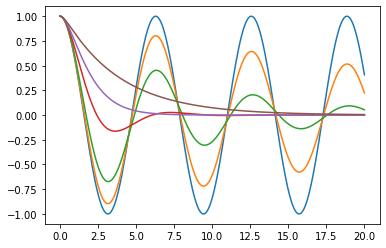

In [120]:
y_lambda = sympy.lambdify((t, m, alpha, k), y_sol.rhs)
tt = np.linspace(0, 20, 500)
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=0))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=.07))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=.25))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=1))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=2.01))
plt.plot(tt, y_lambda(tt, m=1, k=1, alpha=4))
pass

### Пример. Падение тела с учетом сопротивления воздуха

In [121]:
y = sympy.Function('y')

In [122]:
m, g, k, h = sympy.symbols('m g k h')

In [123]:
deq = m*y(t).diff(t,t) + k*sympy.Abs(y(t).diff(t))*(y(t).diff(t)) + m*g
sympy.Eq(deq)

Eq(g*m + k*Abs(Derivative(y(t), t))*Derivative(y(t), t) + m*Derivative(y(t), (t, 2)), 0)

Данное уравнение окажется не по зубам библиотеке. Если выполнить следующую команду, то получите ошибку:

In [124]:
#sympy.dsolve(deq)

Мы можем помочь библиотеке: рассмотреть два варианта: $y'>0$ и $y'<0$:

In [125]:
deq_pos = m*y(t).diff(t,t) + k*(y(t).diff(t))**2 + m*g
sympy.Eq(deq_pos)

Eq(g*m + k*Derivative(y(t), t)**2 + m*Derivative(y(t), (t, 2)), 0)

In [126]:
y_pos = sympy.dsolve(deq_pos, ics={y(0): h, sympy.diff(y(t), t).subs(t,0): 0})
y_pos

Eq(y(t), g*m*t*sqrt(-1/(g*k*m)) + h + m*log(exp(2*t/(m*sqrt(-1/(g*k*m)))) + 1)/k - m*log(2)/k)

In [127]:
deq_neg = m*y(t).diff(t,t) - k*(y(t).diff(t))**2 + m*g
sympy.Eq(deq_pos)

Eq(g*m + k*Derivative(y(t), t)**2 + m*Derivative(y(t), (t, 2)), 0)

In [128]:
y_neg = sympy.dsolve(deq_neg, ics={y(0): h, sympy.diff(y(t), t).subs(t,0): 0})
y_neg

Eq(y(t), g*m*t*sqrt(1/(g*k*m)) + h - m*log(exp(2*t/(m*sqrt(1/(g*k*m)))) + 1)/k + m*log(2)/k)

Формулы получаются громоздкими (хотя их и можно записать компактнее). Дальше нужно как-то склеивать эти два семейства решений. Мы видим, что в данном случае решение численными методами этого уравнения не имеет таких недостатков.

## 7. Линейная алгебра

### 7.1. Простейшие операции с матрицами

Создать символьную матрицу можно с помощью конструктора `Matrix`:

In [129]:
A = sympy.Matrix([[1, 2], [3, 4]])
A

Matrix([
[1, 2],
[3, 4]])

In [130]:
A.shape

(2, 2)

In [131]:
B = sympy.Matrix([[1, -2], [-3, 4]])
B

Matrix([
[ 1, -2],
[-3,  4]])

Можно создавать матрицы, у которых элементы - символьные выражения:

In [132]:
sympy.Matrix([[1, x], [2*x**2-3*x, 4*x]])

Matrix([
[           1,   x],
[2*x**2 - 3*x, 4*x]])

Можно создавать матрицы специального вида. Например, диагональные и блочно-диагональные матрицы:

In [133]:
sympy.diag(1, 2)

Matrix([
[1, 0],
[0, 2]])

In [134]:
sympy.diag(1,2,A,A)

Matrix([
[1, 0, 0, 0, 0, 0],
[0, 2, 0, 0, 0, 0],
[0, 0, 1, 2, 0, 0],
[0, 0, 3, 4, 0, 0],
[0, 0, 0, 0, 1, 2],
[0, 0, 0, 0, 3, 4]])

Поддерживаются основные операции с матрицами: сложение, уножение на скаляры, матричное умножение, возведение в степень.

Обратите внимание, что операция `*` выполняет матричное умножение, аналогично для возведения в степень (в отличие от `*` и возведения в степень для массивов пакета `numpy`, где `*` соответствует покомпонентному умножение, а `**` - покомпонентное возведение в степень).

In [135]:
2*A

Matrix([
[2, 4],
[6, 8]])

In [136]:
A*B

Matrix([
[-5,  6],
[-9, 10]])

In [137]:
A**2

Matrix([
[ 7, 10],
[15, 22]])

Обратная матрица:

In [138]:
A**(-1)

Matrix([
[ -2,    1],
[3/2, -1/2]])

или

In [139]:
A.inv()

Matrix([
[ -2,    1],
[3/2, -1/2]])

Транспонированная матрица:

In [140]:
A.T

Matrix([
[1, 3],
[2, 4]])

Определитель:

In [141]:
sympy.det(A)

-2

### Пример. Определитель Вандермонда

In [142]:
x0, x1, x2, x3 = sympy.symbols('x0, x1, x2, x3')

In [143]:
W = sympy.Matrix([
    [1, x0, x0**2],
    [1, x1, x1**2],
    [1, x2, x2**2]])
W

Matrix([
[1, x0, x0**2],
[1, x1, x1**2],
[1, x2, x2**2]])

In [144]:
W.det()

-x0**2*x1 + x0**2*x2 + x0*x1**2 - x0*x2**2 - x1**2*x2 + x1*x2**2

In [145]:
W.det().factor()

-(x0 - x1)*(x0 - x2)*(x1 - x2)

In [146]:
W = sympy.Matrix([
    [1, x0, x0**2, x0**3],
    [1, x1, x1**2, x1**3],
    [1, x2, x2**2, x2**3],
    [1, x3, x3**2, x3**3]])
W

Matrix([
[1, x0, x0**2, x0**3],
[1, x1, x1**2, x1**3],
[1, x2, x2**2, x2**3],
[1, x3, x3**2, x3**3]])

In [147]:
W.det().factor()

(x0 - x1)*(x0 - x2)*(x0 - x3)*(x1 - x2)*(x1 - x3)*(x2 - x3)

### 7.2. Системы линейных уравнений

Приведение к ступенчатому виду

In [148]:
M = sympy.Matrix([[1, -2, -2, 0], [-2, 4, 2, -1], [1, -2, 0, 1]])
M


Matrix([
[ 1, -2, -2,  0],
[-2,  4,  2, -1],
[ 1, -2,  0,  1]])

In [149]:
Ms, pivots = M.rref()
Ms

Matrix([
[1, -2, 0,   1],
[0,  0, 1, 1/2],
[0,  0, 0,   0]])

In [150]:
pivots

(0, 2)

Базис пространства решений однородной системы (базис ядра матрицы, или базис нуль-пространства):

In [151]:
M.nullspace()

[Matrix([
 [2],
 [1],
 [0],
 [0]]), Matrix([
 [  -1],
 [   0],
 [-1/2],
 [   1]])]

Базис линейной оболочки строк матрицы:

In [152]:
M.rowspace()

[Matrix([[1, -2, -2, 0]]), Matrix([[0, 0, -2, -1]])]

Базис линейной оболочки столбцов матрицы:

In [153]:
M.columnspace()

[Matrix([
 [ 1],
 [-2],
 [ 1]]), Matrix([
 [-2],
 [ 2],
 [ 0]])]

### 7.3. Собственные числа и собственные векторы матрицы

In [154]:
A.eigenvals()

{5/2 - sqrt(33)/2: 1, 5/2 + sqrt(33)/2: 1}

In [155]:
A.eigenvects()

[(5/2 - sqrt(33)/2, 1, [Matrix([
   [-2/(-3/2 + sqrt(33)/2)],
   [                     1]])]), (5/2 + sqrt(33)/2, 1, [Matrix([
   [-2/(-sqrt(33)/2 - 3/2)],
   [                     1]])])]

Диагонализация матрицы

In [156]:
P, D = A.diagonalize()

In [157]:
P

Matrix([
[-sqrt(33)/6 - 1/2, -1/2 + sqrt(33)/6],
[                1,                 1]])

In [158]:
D

Matrix([
[5/2 - sqrt(33)/2,                0],
[               0, 5/2 + sqrt(33)/2]])

Должно иметь место равенство $D = P^{-1} A P$. Проверим:

In [159]:
sympy.simplify(P.inv()*A*P)

Matrix([
[5/2 - sqrt(33)/2,                0],
[               0, 5/2 + sqrt(33)/2]])

Характеристический многочлен:

In [160]:
lamda = sympy.symbols('lamda')
lamda

lamda

In [161]:
A.charpoly(lamda).factor()

lamda**2 - 5*lamda - 2

### 7.4. Жорданова форма

In [162]:
A = sympy.Matrix([[2, -1, 2], [-1, 0, -2], [0, 1, 1]])
A

Matrix([
[ 2, -1,  2],
[-1,  0, -2],
[ 0,  1,  1]])

In [163]:
P, J = A.jordan_form()
J

Matrix([
[1, 1, 0],
[0, 1, 1],
[0, 0, 1]])

In [164]:
P

Matrix([
[ 2,  1, 1],
[ 0, -1, 0],
[-1,  0, 0]])

Должно иметь место равенство $J = P^{-1} A P$. Проверим:

In [165]:
sympy.simplify(P.inv()*A*P)

Matrix([
[1, 1, 0],
[0, 1, 1],
[0, 0, 1]])

## 8. Почему SymPy?

Приведем перевод отрывка из <a href="https://docs.sympy.org/latest/tutorial/intro.html#why-sympy">руководства</a> по библиотеке:

Существует множество систем компьютерной алгебры. 
В <a href="https://en.wikipedia.org/wiki/List_of_computer_algebra_systems">этой статье</a> на Википедии перечислены многие из них. Что делает `SymPy` лучшим выбором, чем альтернативы?

Во-первых, `SymPy` абсолютно бесплатен. Он имеет открытый исходный код и распространяется по свободной лицензии BSD, поэтому вы можете изменить исходный код и даже продать его, если хотите. Это контрастирует с популярными коммерческими системами, такими как Maple или Mathematica, лицензии на которые стоят сотни долларов.

Во-вторых, `SymPy` использует Python. Большинство систем компьютерной алгебры изобретают свой собственный язык. Но не `SymPy`. `SymPy` полностью написан на Python и полностью исполняется на Python. Это означает, что если вы уже знаете Python, гораздо легче начать работу с `SymPy`, потому что вы уже знаете синтаксис (а если вы не знаете Python, его действительно легко освоить). Мы уже знаем, что Python - это хорошо разработанный, проверенный в бою язык. Разработчики `SymPy` уверены в своих возможностях в создании математического программного обеспечения, но дизайн языка программирования - это совсем другое. Повторно используя существующий язык, мы можем сосредоточиться на тех вещах, которые имеют значение - на математике.

Другая система компьютерной алгебры, *Sage* также использует Python в качестве языка. Но *Sage* большой, с загрузкой более гигабайта. Преимущество `SymPy` в том, что он небольшой. Помимо того, что он относительно небольшой, он не имеет никаких зависимостей, кроме Python, поэтому его можно использовать практически везде. Кроме того, цели *Sage* и цели `SymPy` различны. *Sage* стремится быть полнофункциональной системой для математики и стремится сделать это путем объединения всех основных математических систем с открытым исходным кодом в одну. Когда вы вызываете какую-то функцию в *Sage*, например, `integrate`, она вызывает один из пакетов с открытым исходным кодом, который она включает. Фактически, `SymPy` включен в *Sage*. `SymPy`, с другой стороны, стремится быть независимой системой со всеми функциями, реализованными в самом `SymPy`.

Еще одной важной особенностью `SymPy` является то, что его можно использовать в качестве библиотеки. Многие системы компьютерной алгебры ориентированы на то, чтобы их можно было использовать в интерактивных средах, но если вы хотите автоматизировать или расширить их, это сложно сделать. С `SymPy` вы можете так же легко использовать его в интерактивной среде Python или импортировать в свое собственное приложение Python. `SymPy` также предоставляет API-интерфейсы, позволяющие легко расширять его с помощью собственных функций.